In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [89]:
df =pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df.shape

(42000, 785)

In [91]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
import matplotlib.pyplot as plt

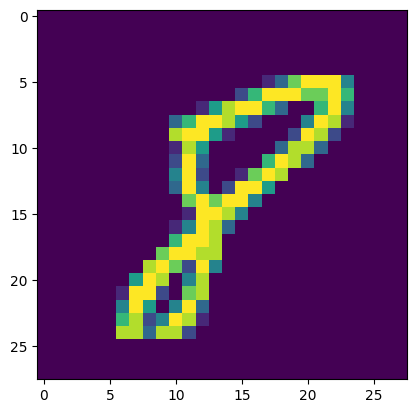

In [93]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

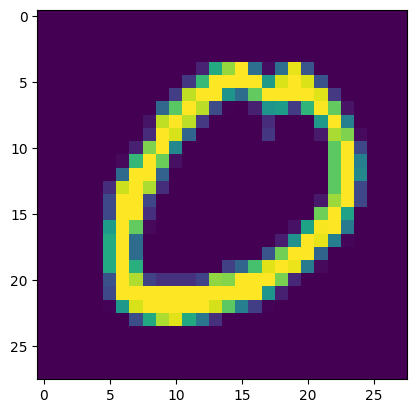

In [94]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [95]:
X =df.iloc[:,1:]
y=df.iloc[:,0]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
X_train.shape

(33600, 784)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
KNN =KNeighborsClassifier()

In [101]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [102]:
import time
start = time.time()
y_pred =KNN.predict(X_test)
print(time.time() - start)

12.950783014297485


In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9648809523809524

In [105]:
# step 1 of Pca to Centeralize value
from sklearn.preprocessing import StandardScaler

In [106]:
scaler=StandardScaler()

In [107]:
X_train  = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [126]:
# PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components=None)
pca = PCA(n_components=200)# agr hm none use krain gy to wo jitny parameters measn columns 
# hongy utny hi ly ga like 784 hm km yn zayada b kr skty hain apni mrzi sy

In [127]:
X_train_trf =pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [73]:
X_train.shape

(33600, 784)

In [124]:
#pca = PCA(n_components =200)

In [128]:
X_train_trf.shape

(33600, 200)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier()
KNN.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [130]:
y_pred =KNN.predict(X_test_trf)

In [131]:
accuracy_score(y_test,y_pred)

0.670952380952381

In [ ]:
for i in range(1,785):
    pca =pca = PCA(n_components =i)
    X_train_trf =pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)
    KNN =KNeighborsClassifier()
    KNN.fit(X_train_trf,y_train)
    y_pred =KNN.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))
    
    

0.25452380952380954
0.32404761904761903
0.5035714285714286
0.6552380952380953
0.7232142857142857
0.8188095238095238
0.8351190476190476
0.8642857142857143
0.876547619047619
0.7613095238095238
0.773452380952381
0.7775
0.7232142857142857
0.7389285714285714
0.7025
0.714047619047619
0.7619047619047619
0.7564285714285715
0.7236904761904762
0.7511904761904762
0.794047619047619
0.7721428571428571
0.785
0.73
0.7158333333333333
0.7196428571428571
0.7180952380952381
0.7214285714285714
0.7170238095238095
0.7072619047619048
0.7103571428571429
0.7086904761904762
0.7088095238095238
0.7180952380952381
0.718452380952381
0.6998809523809524
0.7029761904761904
0.7007142857142857
0.7097619047619048
0.6914285714285714
0.6917857142857143
0.6926190476190476
0.6886904761904762
0.6971428571428572
0.6858333333333333
0.6729761904761905
0.6891666666666667
0.6851190476190476
0.6984523809523809
0.6948809523809524
0.6919047619047619
0.6917857142857143
0.6942857142857143
0.6864285714285714
0.6832142857142857
0.6891666

In [135]:
# transforming to 2D cordinate sytem
pca =PCA(n_components=2)
X_train_trf1 = pca.fit_transform(X_train)
X_test_trf1 = pca.fit_transform(X_test)

In [136]:
X_train_trf1

array([[-2.71863289, -0.48986513],
       [-0.67699003, -6.75339684],
       [-3.03323584,  6.50965149],
       ...,
       [ 2.14886338,  0.78075097],
       [ 1.05957718,  0.94774173],
       [17.70257736,  1.96215291]])

In [139]:
import plotly.express as px
y_train_trf1 = y_train.astype(str)
fig =px.scatter(x=X_train_trf1[:,0],
                y=X_train_trf1[:,1],
                color=y_train_trf1,
                 color_discrete_sequence=px.colors.qualitative.G10
               )
fig.show()

In [140]:
# transforming into3D

In [141]:
pca=PCA(n_components=3)
X_train_trf3 =pca.fit_transform(X_train)
X_test_trf3 =pca.fit_transform(X_test)

In [142]:
X_train_trf3

array([[-2.71866434, -0.49007498,  1.13631135],
       [-0.67698089, -6.7534915 , -2.33583645],
       [-3.03322583,  6.5099114 ,  7.49203465],
       ...,
       [ 2.14887494,  0.78085179, -0.74837522],
       [ 1.05952972,  0.9473337 ,  3.95056642],
       [17.70254451,  1.96159022, -4.9427797 ]])

In [144]:
y_train_trf3 =y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf3[:,0],y=X_train_trf3[:,1],z=X_train_trf3[:,2],
                    color=y_train_trf3)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)

fig.show()


In [146]:
pca.explained_variance_
# Eigen.values

array([40.87278367, 28.96627969, 27.04279981])

In [147]:
pca.components_
#Eigen_vectors

array([[ 1.46549180e-18, -4.36470818e-19, -8.08929959e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.01907687e-17,  1.56089624e-17,  4.14613188e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.31425146e-16,  1.74737312e-18, -2.17579445e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [149]:
pca.components_.shape

(3, 784)

In [ ]:
# find optimam number of principal componets
# jis sy hamara kam ho jaye 

In [150]:
# maina fisr ka percentage value find krni lamda ko total lamda sy divide kr ky *100 
#krain gy hr lambda ki koi na koi value hogi ,32,45,67 ,hmny kam kam sy90 %perecnet variance 

In [151]:
pca.explained_variance_ratio_

array([0.06054506, 0.0429079 , 0.04005864])

In [152]:
pca=PCA(n_components=None)
X_train_trf3 =pca.fit_transform(X_train)
X_test_trf3 =pca.fit_transform(X_test)

In [154]:
pca.explained_variance_.shape

(784,)

In [155]:
pca.components_.shape

(784, 784)

In [157]:
pca.explained_variance_ratio_

array([6.05450635e-02, 4.29078990e-02, 4.00586385e-02, 3.06434453e-02,
       2.67082572e-02, 2.30605039e-02, 2.03205581e-02, 1.90427586e-02,
       1.67430484e-02, 1.50209240e-02, 1.44712146e-02, 1.30785247e-02,
       1.19412334e-02, 1.16799146e-02, 1.12682944e-02, 1.07180984e-02,
       1.01060309e-02, 1.00952174e-02, 9.61045504e-03, 9.47906601e-03,
       9.08552837e-03, 8.53606160e-03, 8.25990213e-03, 8.07304529e-03,
       7.86749539e-03, 7.63654074e-03, 7.43262890e-03, 7.13098479e-03,
       7.01533517e-03, 6.74454768e-03, 6.69432230e-03, 6.51996133e-03,
       6.39433310e-03, 6.10336315e-03, 6.02070722e-03, 5.92590082e-03,
       5.88410511e-03, 5.73944937e-03, 5.62305540e-03, 5.40195282e-03,
       5.28091679e-03, 5.23145401e-03, 5.12090062e-03, 5.04713335e-03,
       4.87084315e-03, 4.77416222e-03, 4.68990375e-03, 4.68130866e-03,
       4.60304339e-03, 4.54798125e-03, 4.46756591e-03, 4.43306830e-03,
       4.36595190e-03, 4.27394974e-03, 4.19992637e-03, 4.15142048e-03,
      

In [158]:
# we know to find sum of lmda where variance is 90 so we call
#comulative sum function of numpy
np.cumsum(pca.explained_variance_ratio_)

array([0.06054506, 0.10345296, 0.1435116 , 0.17415505, 0.2008633 ,
       0.22392381, 0.24424437, 0.26328712, 0.28003017, 0.2950511 ,
       0.30952231, 0.32260084, 0.33454207, 0.34622198, 0.35749028,
       0.36820838, 0.37831441, 0.38840962, 0.39802008, 0.40749915,
       0.41658467, 0.42512074, 0.43338064, 0.44145368, 0.44932118,
       0.45695772, 0.46439035, 0.47152133, 0.47853667, 0.48528122,
       0.49197554, 0.4984955 , 0.50488983, 0.5109932 , 0.5170139 ,
       0.5229398 , 0.52882391, 0.53456336, 0.54018641, 0.54558837,
       0.55086928, 0.55610074, 0.56122164, 0.56626877, 0.57113961,
       0.57591378, 0.58060368, 0.58528499, 0.58988803, 0.59443601,
       0.59890358, 0.60333665, 0.6077026 , 0.61197655, 0.61617648,
       0.6203279 , 0.6243674 , 0.62836904, 0.632244  , 0.63608538,
       0.63988348, 0.64363517, 0.64732886, 0.65099829, 0.65461534,
       0.65818137, 0.66169008, 0.66515602, 0.66856668, 0.67192998,
       0.67525401, 0.67855196, 0.68178585, 0.68499317, 0.68817

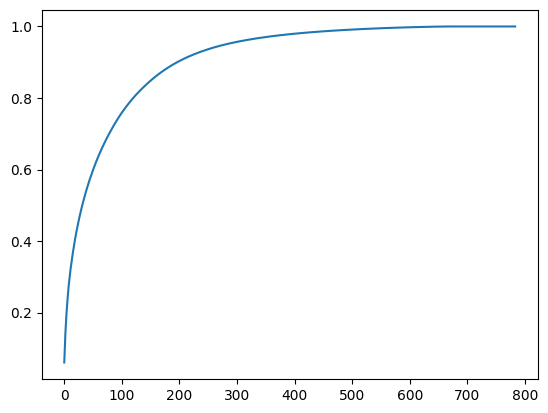

In [159]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [161]:
# 250 components is used for 90 percents variacne to explain
